# Task 3: Forest Cover Type Classification

## Description:
- Dataset (Recommended): Covertype (UCI)
- Predict the type of forest cover based on cartographic and environmental features
- Clean and preprocess the data including categorical handling
- Train and evaluate multi-class classification models
- Visualize confusion matrix and feature importance

## Bonuses:
- Compare different models (e.g., Random Forest vs. XGBoost)
- Perform hyperparameter tuning

# Downloading the dataset

In [5]:
!kaggle datasets download -d uciml/forest-cover-type-dataset 

Dataset URL: https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset
License(s): unknown
  0%|                                               | 0.00/11.2M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 11.2M/11.2M [00:00<00:00, 678MB/s]


In [6]:
!unzip forest-cover-type-dataset.zip

Archive:  forest-cover-type-dataset.zip
  inflating: covtype.csv             


# Inspecting the data and performing EDA

In [3]:
import pandas as pd 
from matplotlib import pyplot as plt

# Load the dataset
forest_data = pd.read_csv("covtype.csv", delimiter=',', header='infer')

In [4]:
# Checking for null values

print("Null values")
forest_data.isnull().sum()

Null values


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [5]:
# Checking for duplicates

print("Duplicate values")
forest_data.duplicated().sum()

Duplicate values


np.int64(0)

In [6]:
# Checking the data types of the dataset
print("Data types")
forest_data.info()

Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    58101

In [7]:
# Checking the first rows of the dataset
print("First rows")
forest_data.head()

First rows


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
# Checking summary for basic stats
print("Sumarry of stats")
forest_data.describe()

Sumarry of stats


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


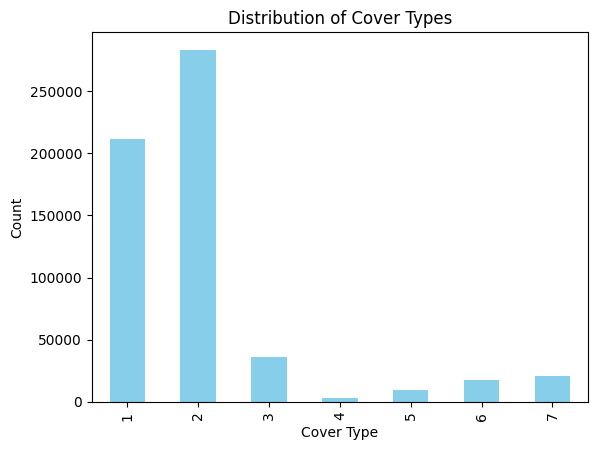

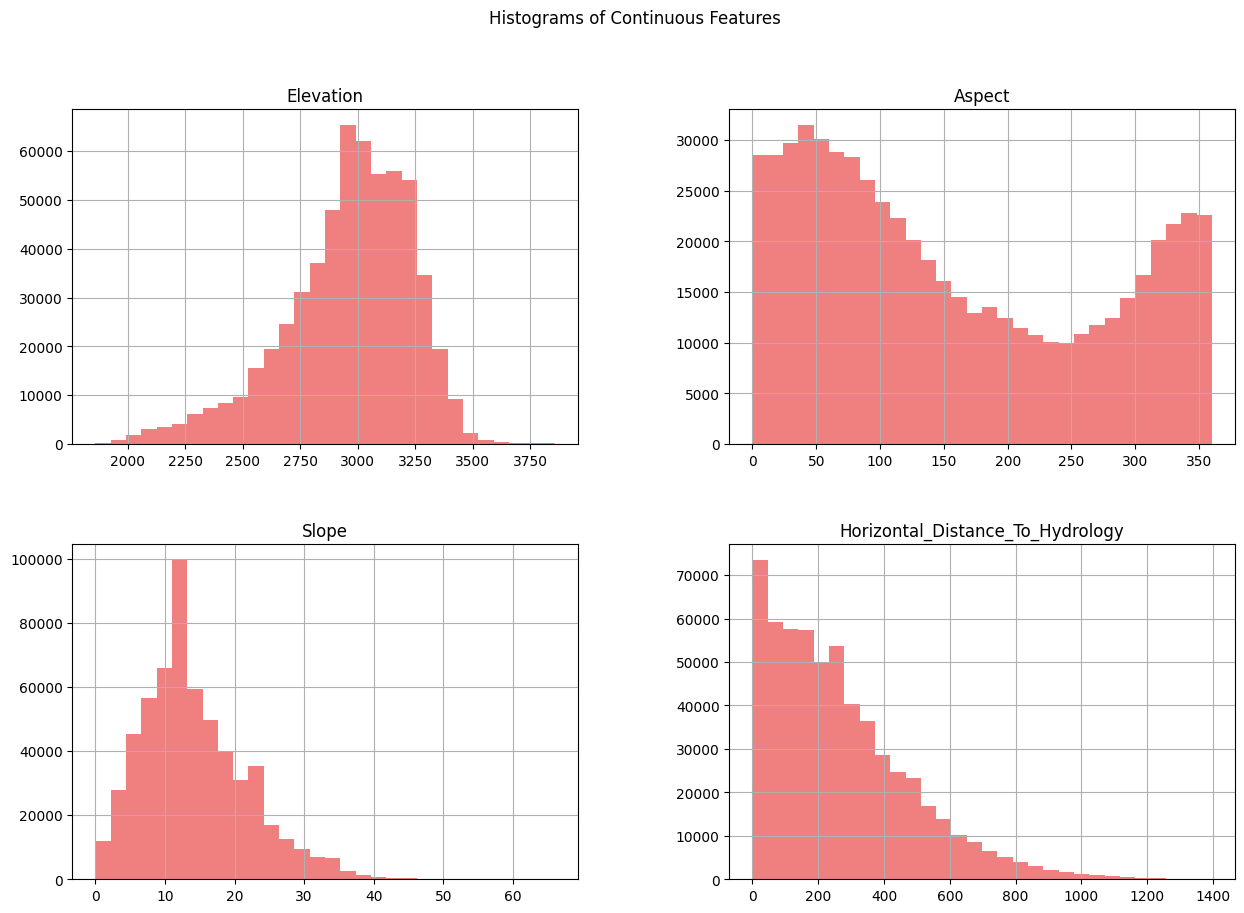

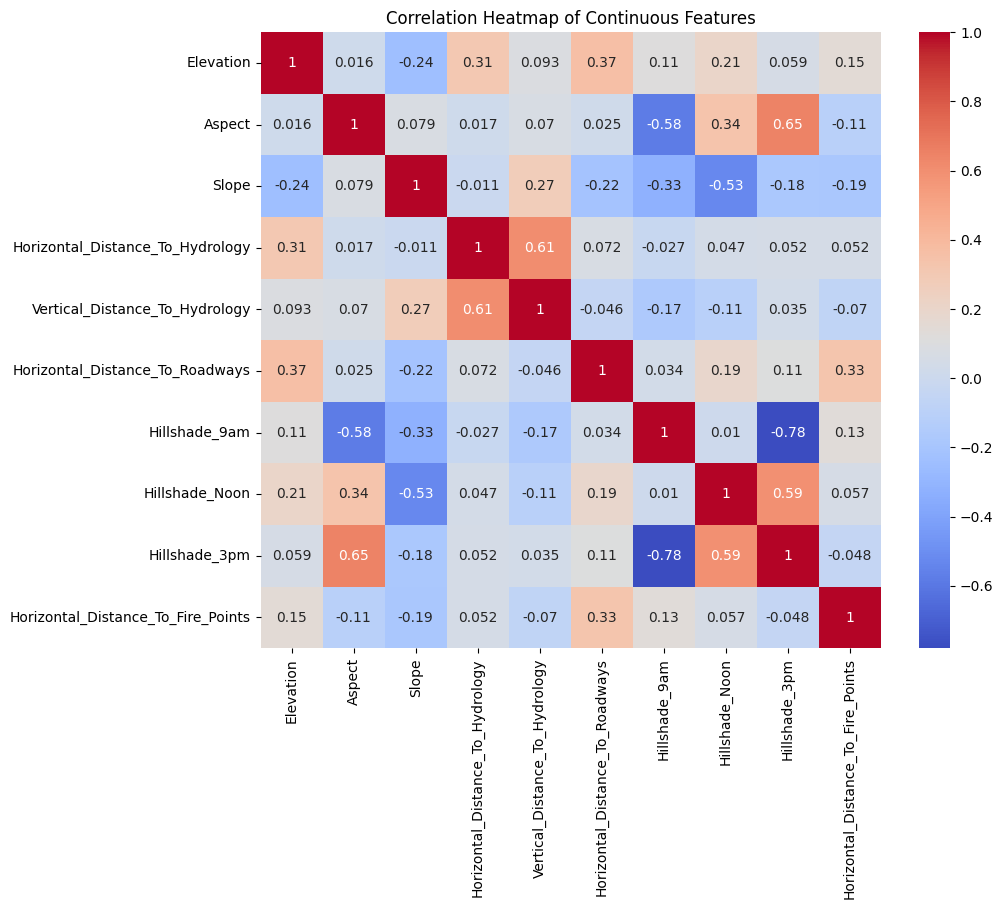

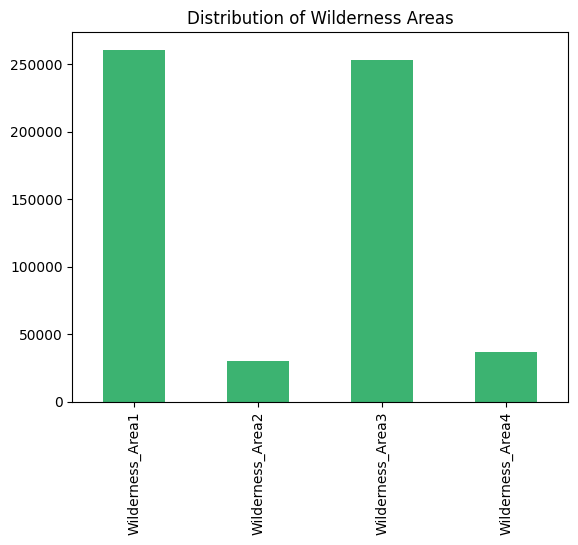

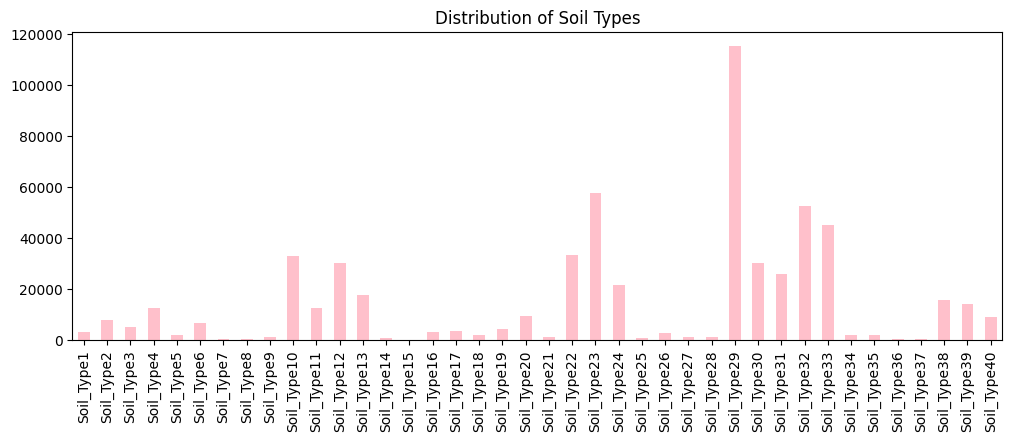

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# The target class
forest_data['Cover_Type'].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribution of Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

# Some continuous features' histograms
continuous_cols = [
    "Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology"
]

forest_data[continuous_cols].hist(figsize=(15,10), bins=30, color="lightcoral")
plt.suptitle("Histograms of Continuous Features")
plt.show()

# The correlation heatmap
all_continuous_cols = [
    "Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"
]
plt.figure(figsize=(10,8))
sns.heatmap(forest_data[all_continuous_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Features")
plt.show()

# The wilderness distribution
wilderness_cols = [c for c in forest_data.columns if "Wilderness_Area" in c]
forest_data[wilderness_cols].sum().plot(kind="bar", color="mediumseagreen")
plt.title("Distribution of Wilderness Areas")
plt.show()

# The soil type distribution
soil_cols = [c for c in forest_data.columns if "Soil_Type" in c]
forest_data[soil_cols].sum().plot(kind="bar", figsize=(12,4), color="pink")
plt.title("Distribution of Soil Types")
plt.show()


In [10]:
# Splitting the target column from the features

features = forest_data.drop('Cover_Type', axis=1)
target = forest_data['Cover_Type']

In [11]:
# Scaling the continuous features cause they range vastly in values
from sklearn.preprocessing import StandardScaler

continuous_cols = [
    "Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"
]

scaler = StandardScaler()
features[continuous_cols] = scaler.fit_transform(features[continuous_cols])

In [12]:
# Dropping low-variance columns (Some soil types has almost zero values so they don't add much to the model) to optimize model performance
low_variance_cols = [col for col in features.columns if features[col].std() == 0]
features = features.drop(columns=low_variance_cols)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Train-test splitting (stratified to preserve class proportions cause the data is imbalanced)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=42
)

# Initializing the random forest
model = RandomForestClassifier(
    # Using hyperparameter tuning to choose the best parameters
    n_estimators=200,    
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training the model
model.fit(X_train, y_train)

# Predicting the results
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.79      0.86      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.95      0.95    116203



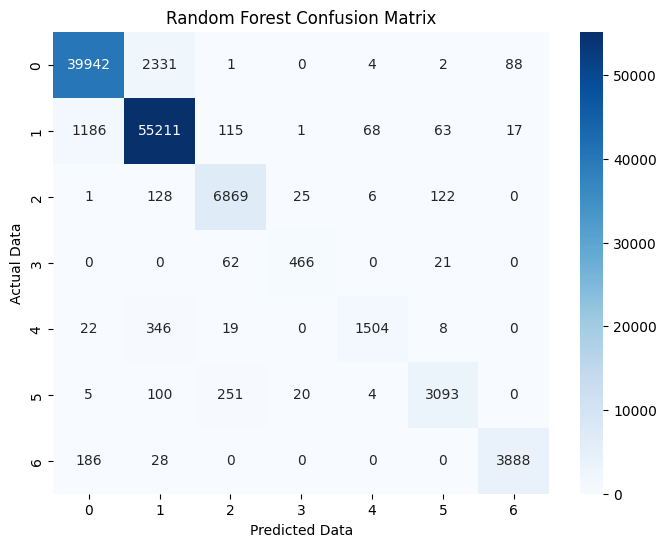

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# The confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Data")
plt.ylabel("Actual Data")
plt.show()

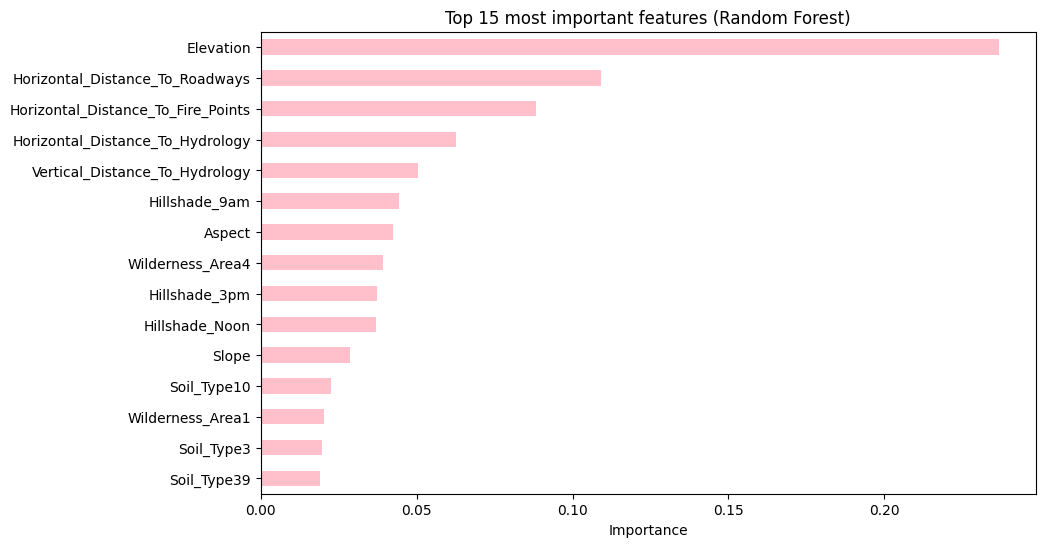

In [15]:
#  Feature importance visualization
feature_importance = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh', color='pink')
plt.title("Top 15 most important features (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

# XGBoost algorithm comparison

In [1]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:02m


In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=7
)

# Adjusting the target labels to fit XGBoost
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Fitting the model
xgb_model.fit(X_train, y_train_adj)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

Accuracy: 0.8868876018691428

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.85      0.87     42368
           2       0.88      0.91      0.90     56661
           3       0.92      0.93      0.92      7151
           4       0.89      0.86      0.88       549
           5       0.91      0.70      0.79      1899
           6       0.89      0.86      0.87      3473
           7       0.95      0.93      0.94      4102

    accuracy                           0.89    116203
   macro avg       0.90      0.86      0.88    116203
weighted avg       0.89      0.89      0.89    116203



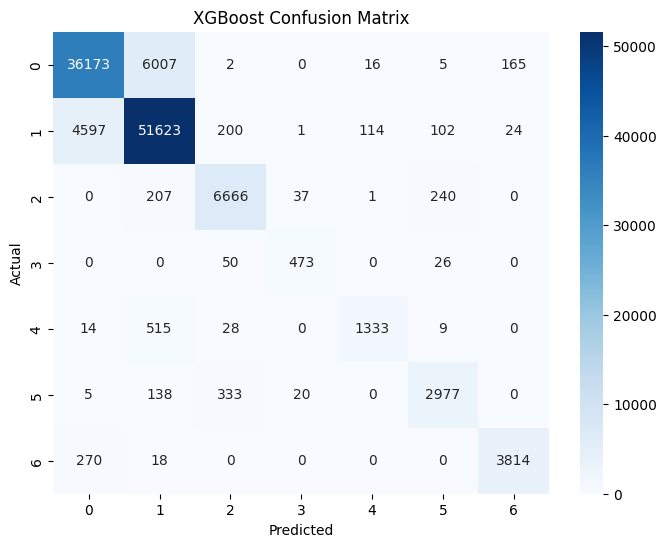

In [21]:
# Evaluation
# Shifting the target values back for comparison
y_pred_xgb = y_pred_xgb + 1
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

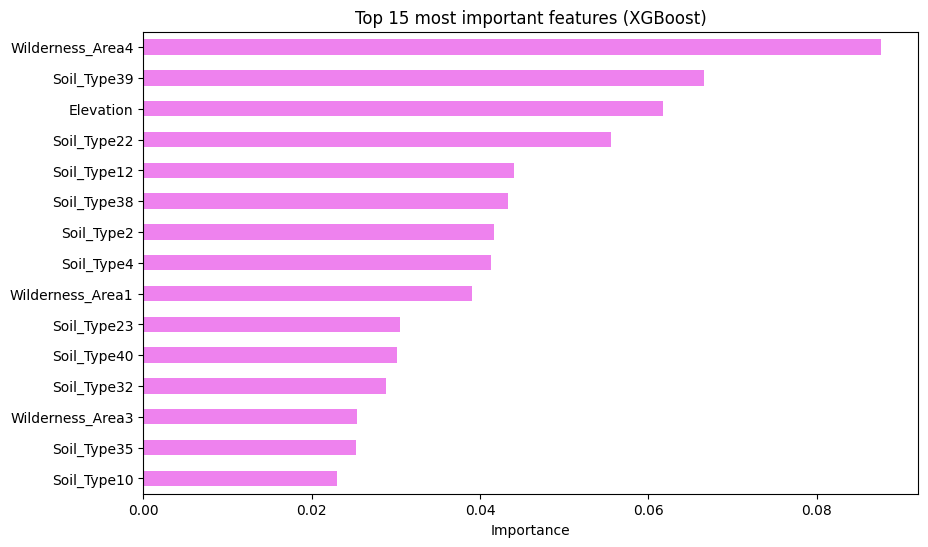

In [27]:
#  Feature importance visualization
feature_importance = pd.Series(xgb_model.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importance.head(15).plot(kind='barh', color='violet')
plt.title("Top 15 most important features (XGBoost)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()

# Comparing Random forest and XGBoost

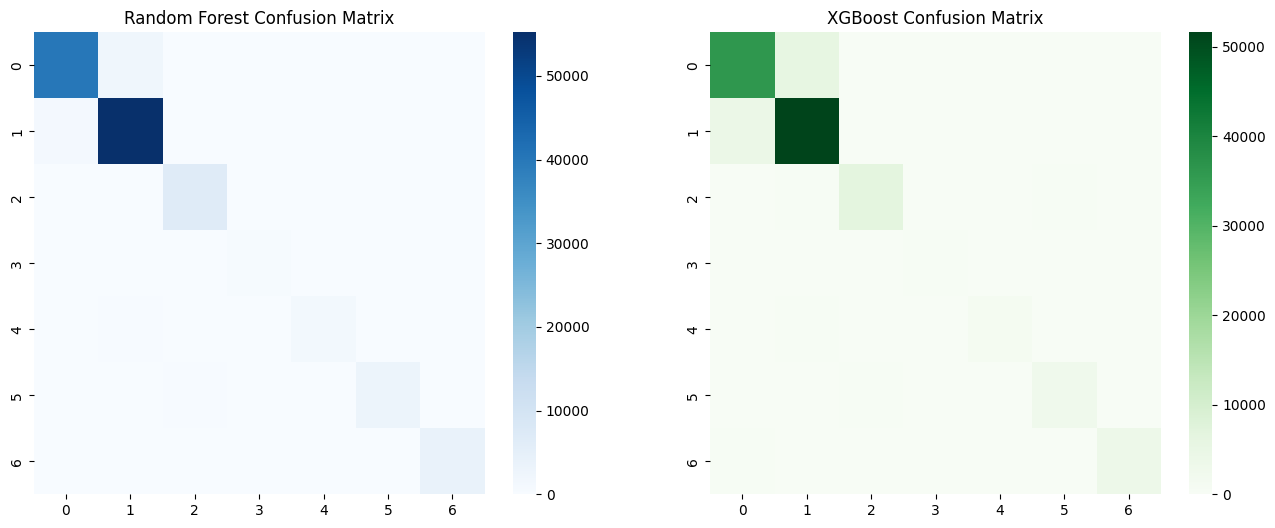

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=False, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")

plt.show()

In [24]:
import pandas as pd

# Random Forest feature importances
rf_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)

# XGBoost feature importances
xgb_importances = pd.Series(xgb_model.feature_importances_, index=features.columns).sort_values(ascending=False)

# Comparing top 15
pd.DataFrame({
    'Random Forest': rf_importances.head(15),
    'XGBoost': xgb_importances.head(15)
})

,Random Forest,XGBoost
Aspect,0.042354,NaN
Elevation,0.236686,0.061704
Hillshade_3pm,0.037216,NaN
Hillshade_9am,0.044191,NaN
Hillshade_Noon,0.036817,NaN
Horizontal_Distance_To_Fire_Points,0.088124,NaN
Horizontal_Distance_To_Hydrology,0.062610,NaN
Horizontal_Distance_To_Roadways,0.109156,NaN
Slope,0.028516,NaN
Soil_Type10,0.022602,0.023058


## Model Comparison

- Random Forest performed better than XGBoost on this dataset.
- It reached about 95% accuracy, compared to 89% for XGBoost, and achieved higher F1-scores across most classes.
- Random Forest was also faster to train and easier to interpret.
- XGBoost, while slightly less accurate, showed decent performance on some minority classes and captured more detail in soil and wilderness features.
- Overall, Random Forest gave the best results for this task.